In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


75.07433564850007 122.57400318342076
-70.76567692473566 -158.9109341224946
-32.7773762376214 -59.43589237053128
51.71320588058961 -153.5091366625923
66.41252615340593 -119.57023216901685
-23.544503717341968 -92.70097433501374
-14.689235133367262 -92.60683370913861
16.02138533330583 159.8376846551651
-44.972035910533926 155.09697271420276
78.09469369852593 -123.45246365217457
-85.43843461734679 -59.806565473295706
66.0557636991613 -123.74192360005253
-78.65208942961173 143.80571666788381
46.745723364005954 43.445903544654385
-28.394211721891985 -163.8809322658317
33.30213443520283 -177.91943766687254
-20.904241021350614 -10.402253555473806
-55.78858179033624 26.36283445884044
-48.525946149095844 -159.05857133020152
55.33145105552987 104.22745273362153
3.9540380969219484 -7.092879876182138
-86.12893015437147 -127.00153533557022
43.862564885987894 -177.24465132373228
-9.523076292742175 -25.937554495756842
-35.44748710170456 -53.934504189801444
20.065308514546444 -29.567997270645435
80.637

30.04540137171543 -160.75560360840296
-86.89673078035293 -93.22680836127662
-29.38973540146359 179.41404055966416
37.28178180282825 122.53146149101087
-33.663922322344845 -147.87569129058411
-71.873376217438 -71.39710811767972
47.46522691198638 73.06239152454862
89.23860232534443 -169.0501051866934
-10.562723465782256 141.04741136501764
18.132640015283826 -111.63095819562155
87.11579862890969 85.72725284383438
41.02137067651887 -123.8519829526144
-53.812669311703054 -67.73367734935013
-21.933650424874457 -156.19826078006878
29.173300286719666 109.2516357703729
-82.66725383095061 54.425183910802104
35.86680083167745 -57.41197324324524
56.46842077453249 21.077251666056952
11.065417239880276 155.97569848816045
11.33445933631819 -149.22936730080602
65.54542856010488 0.18215157343752253
-51.81361423123908 -174.65722175910506
61.80714657459035 -50.75576859428995
-1.02286269861375 168.28351246515103
75.04048333607179 -71.70979096707235
-10.6339132008209 12.037551745841824
-79.8434713883845 14

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee1dcefdf5bc3590ef229d91dec76318


In [7]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
      #  set_count += 1
       # record_count = 1
      # time.sleep(60)

# Create endpoint URL with each city.
  #  city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | gualeguay
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | remontnoye
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | zhigalovo
Processing Record 19 of Set 1 | tabou
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | olinda
Processing Record 23 of Set 1 | rocha
Processing Record 24 of Set 1 | ponta do sol
Processing Record 

Processing Record 37 of Set 4 | sulphur
Processing Record 38 of Set 4 | maningrida
Processing Record 39 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | dongying
Processing Record 42 of Set 4 | kualakapuas
Processing Record 43 of Set 4 | vardo
Processing Record 44 of Set 4 | tahoua
Processing Record 45 of Set 4 | amapala
Processing Record 46 of Set 4 | ballitoville
Processing Record 47 of Set 4 | caconda
Processing Record 48 of Set 4 | muli
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | marrakesh
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | iralaya
Processing Record 6 of Set 5 | mosalsk
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | antofagasta
Processing Record 9 of Set 5 | yar-sal

Processing Record 25 of Set 8 | padang
Processing Record 26 of Set 8 | karasjok
Processing Record 27 of Set 8 | ulaangom
Processing Record 28 of Set 8 | hervey bay
Processing Record 29 of Set 8 | yongan
Processing Record 30 of Set 8 | prado
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | viligili
City not found. Skipping...
Processing Record 33 of Set 8 | birao
Processing Record 34 of Set 8 | sheridan
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | cayenne
Processing Record 37 of Set 8 | ahumada
City not found. Skipping...
Processing Record 38 of Set 8 | prieska
Processing Record 39 of Set 8 | kiruna
Processing Record 40 of Set 8 | florence
Processing Record 41 of Set 8 | cabadiangan
Processing Record 42 of Set 8 | synya
Processing Record 43 of Set 8 | kidal
Processing Record 44 of Set 8 | talavera de la reina
Processing Record 45 of Set 8 | finschhafen
Processing Record 46 of Set 8 | muyezerskiy
Processing Recor

Processing Record 12 of Set 12 | bodinayakkanur
Processing Record 13 of Set 12 | san vicente
Processing Record 14 of Set 12 | viransehir
Processing Record 15 of Set 12 | aswan
Processing Record 16 of Set 12 | yumen
Processing Record 17 of Set 12 | tabas
Processing Record 18 of Set 12 | maltahohe
Processing Record 19 of Set 12 | mahanoro
Processing Record 20 of Set 12 | mecca
Processing Record 21 of Set 12 | cabinda
Processing Record 22 of Set 12 | lock haven
Processing Record 23 of Set 12 | cerrito
Processing Record 24 of Set 12 | hua hin
Processing Record 25 of Set 12 | ifanadiana
Processing Record 26 of Set 12 | mentok
City not found. Skipping...
Processing Record 27 of Set 12 | cleburne
Processing Record 28 of Set 12 | caravelas
Processing Record 29 of Set 12 | nara
Processing Record 30 of Set 12 | lawrence
Processing Record 31 of Set 12 | sandata
Processing Record 32 of Set 12 | jerusalem
Processing Record 33 of Set 12 | vilhena
Processing Record 34 of Set 12 | ola
Processing Recor

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,40.91,84,84,11.50,RU,2022-07-21 18:44:33
1,Mataura,-46.1927,168.8643,40.50,96,100,0.74,NZ,2022-07-21 18:44:33
2,Gualeguay,-33.1416,-59.3097,65.75,52,100,7.81,AR,2022-07-21 18:44:34
3,Kodiak,57.7900,-152.4072,54.91,82,100,5.75,US,2022-07-21 18:44:34
4,Yellowknife,62.4560,-114.3525,66.72,42,40,5.75,CA,2022-07-21 18:44:34
5,Pisco,-13.7000,-76.2167,66.02,72,40,6.91,PE,2022-07-21 18:44:35
6,San Cristobal,7.7669,-72.2250,80.78,53,77,7.56,VE,2022-07-21 18:44:35
7,Butaritari,3.0707,172.7902,80.58,75,99,4.50,KI,2022-07-21 18:44:35
8,Hobart,-42.8794,147.3294,39.06,91,3,1.99,AU,2022-07-21 18:41:15
9,Tuktoyaktuk,69.4541,-133.0374,51.80,93,100,5.75,CA,2022-07-21 18:44:36


In [15]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-07-21 18:44:33,71.6872,128.8694,40.91,84,84,11.50
1,Mataura,NZ,2022-07-21 18:44:33,-46.1927,168.8643,40.50,96,100,0.74
2,Gualeguay,AR,2022-07-21 18:44:34,-33.1416,-59.3097,65.75,52,100,7.81
3,Kodiak,US,2022-07-21 18:44:34,57.7900,-152.4072,54.91,82,100,5.75
4,Yellowknife,CA,2022-07-21 18:44:34,62.4560,-114.3525,66.72,42,40,5.75
5,Pisco,PE,2022-07-21 18:44:35,-13.7000,-76.2167,66.02,72,40,6.91
6,San Cristobal,VE,2022-07-21 18:44:35,7.7669,-72.2250,80.78,53,77,7.56
7,Butaritari,KI,2022-07-21 18:44:35,3.0707,172.7902,80.58,75,99,4.50
8,Hobart,AU,2022-07-21 18:41:15,-42.8794,147.3294,39.06,91,3,1.99
9,Tuktoyaktuk,CA,2022-07-21 18:44:36,69.4541,-133.0374,51.80,93,100,5.75


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1658430009.692354

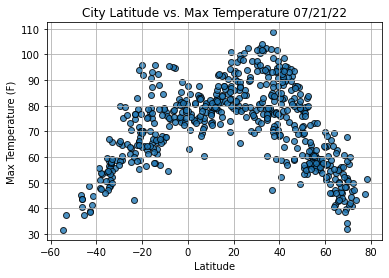

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

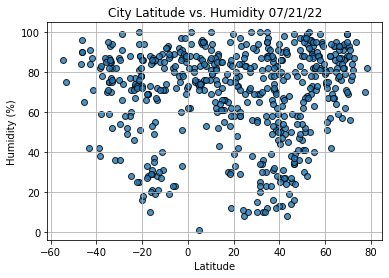

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


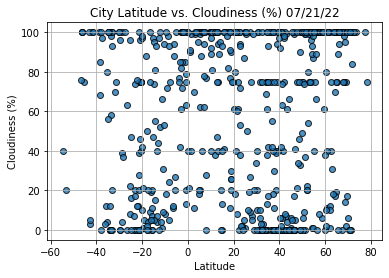

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

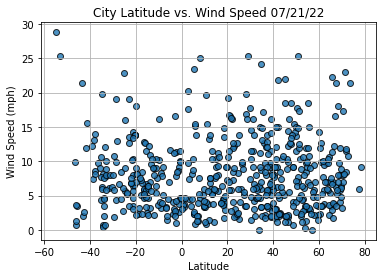

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2022-07-21 18:44:37
Lat                      -21.2078
Lng                      -159.775
Max Temp                    71.65
Humidity                       73
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [25]:
 city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
558    False
559    False
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-07-21 18:44:33,71.6872,128.8694,40.91,84,84,11.50
3,Kodiak,US,2022-07-21 18:44:34,57.7900,-152.4072,54.91,82,100,5.75
4,Yellowknife,CA,2022-07-21 18:44:34,62.4560,-114.3525,66.72,42,40,5.75
6,San Cristobal,VE,2022-07-21 18:44:35,7.7669,-72.2250,80.78,53,77,7.56
7,Butaritari,KI,2022-07-21 18:44:35,3.0707,172.7902,80.58,75,99,4.50


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [42]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-07-21 18:44:33,71.6872,128.8694,40.91,84,84,11.50
3,Kodiak,US,2022-07-21 18:44:34,57.7900,-152.4072,54.91,82,100,5.75
4,Yellowknife,CA,2022-07-21 18:44:34,62.4560,-114.3525,66.72,42,40,5.75
6,San Cristobal,VE,2022-07-21 18:44:35,7.7669,-72.2250,80.78,53,77,7.56
7,Butaritari,KI,2022-07-21 18:44:35,3.0707,172.7902,80.58,75,99,4.50
...,...,...,...,...,...,...,...,...,...
555,La Ronge,CA,2022-07-21 19:00:05,55.1001,-105.2842,60.35,63,100,11.88
557,San Francisco,US,2022-07-21 18:58:00,37.7749,-122.4194,83.84,82,11,11.01
560,Bahia Honda,CU,2022-07-21 19:00:08,22.9036,-83.1592,89.08,58,38,9.08
561,Iskele,TR,2022-07-21 19:00:09,39.4840,26.9278,76.59,50,0,7.92


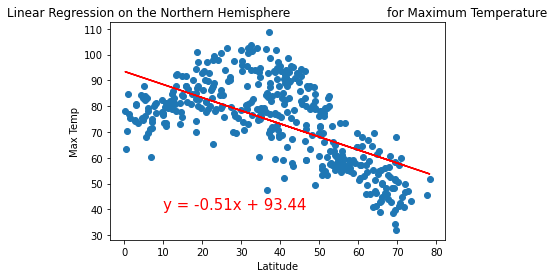

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

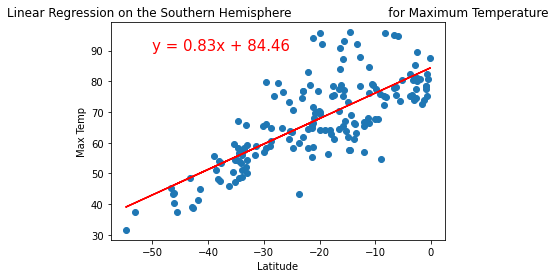

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

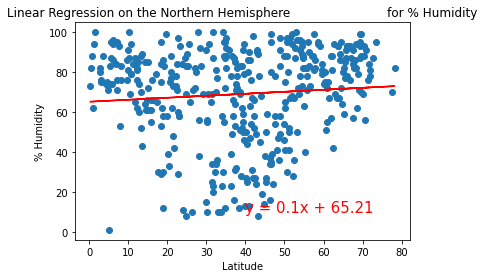

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


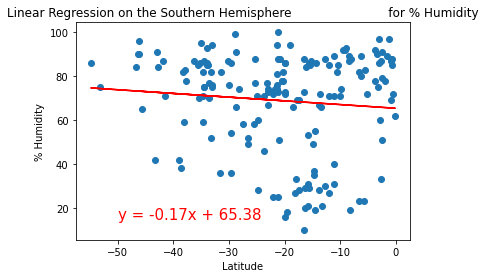

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


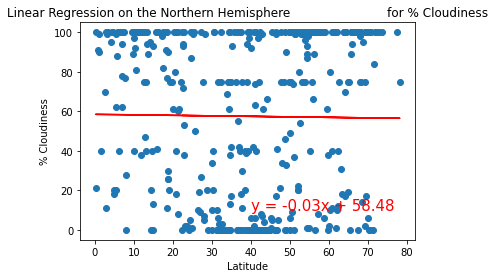

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))


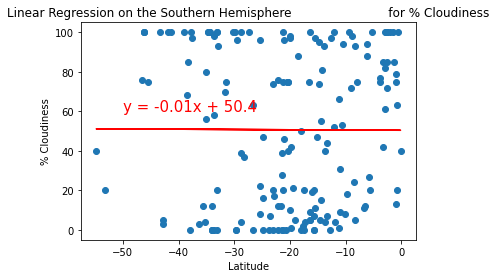

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

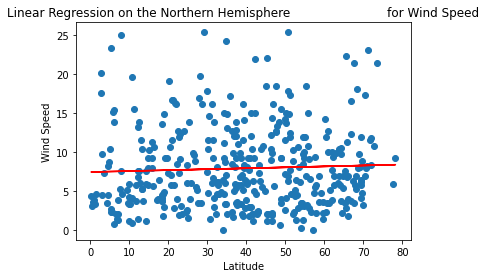

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

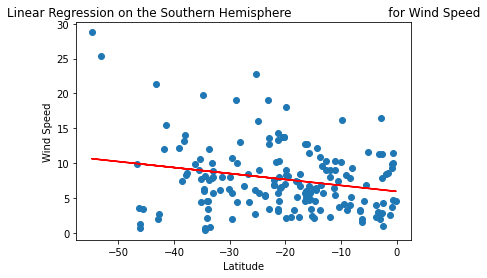

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))